In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

# Visualizar las primeras filas
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
# Ver dimensiones y tipos de datos
df.info()

# Estadísticas generales de las columnas numéricas
df.describe()

# Ver si hay valores faltantes
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

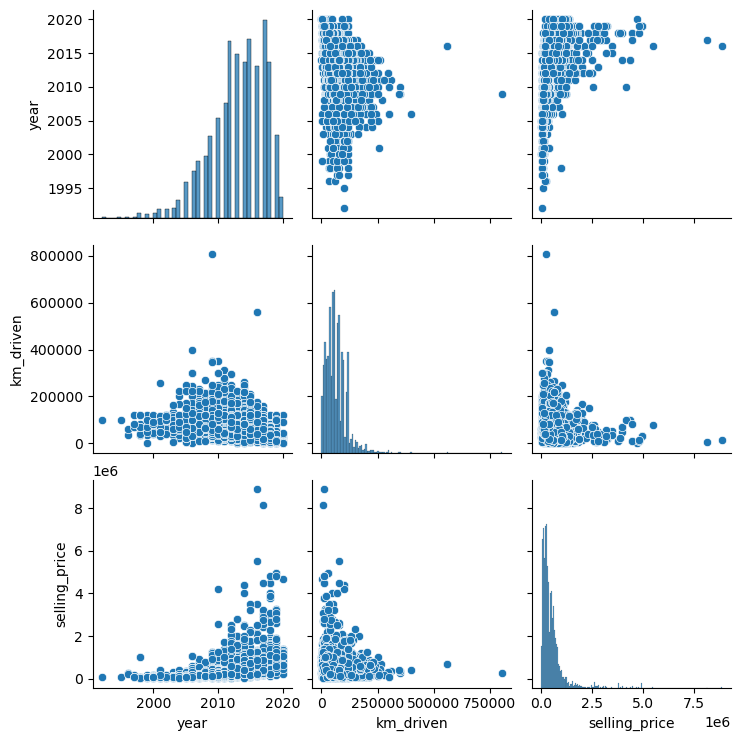

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relación entre año, kilómetros y precio
sns.pairplot(df[['year', 'km_driven', 'selling_price']])
plt.show()


In [7]:
df = df.drop(['name'], axis=1)


In [9]:
df = pd.get_dummies(df, drop_first=True)

In [11]:
X = df.drop('selling_price', axis=1)
y = df['selling_price']

In [13]:
print("X shape:", X.shape)
print("y shape:", y.shape)
X.head()


X shape: (4340, 13)
y shape: (4340,)


,year,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,False,False,False,True,True,False,True,False,False,False,False
1,2007,50000,False,False,False,True,True,False,True,False,False,False,False
2,2012,100000,True,False,False,False,True,False,True,False,False,False,False
3,2017,46000,False,False,False,True,True,False,True,False,False,False,False
4,2014,141000,True,False,False,False,True,False,True,False,True,False,False


In [15]:
from sklearn.model_selection import train_test_split

# División del 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (3472, 13)
X_test: (868, 13)
y_train: (3472,)
y_test: (868,)


In [17]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Mostrar los coeficientes de cada variable
coeficientes = pd.DataFrame(lr_model.coef_, X.columns, columns=["Coeficiente"])
coeficientes

,Coeficiente
year,35764.442216
km_driven,-1.006935
fuel_Diesel,279850.784859
fuel_Electric,-640119.339506
fuel_LPG,53484.366182
fuel_Petrol,-20697.354665
seller_type_Individual,-69819.267902
seller_type_Trustmark Dealer,169804.231596
transmission_Manual,-891338.058520
owner_Fourth & Above Owner,613.220830


In [21]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predicciones con el modelo desarrollado
y_pred = lr_model.predict(X_test)

# Evaluación del modelo
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R² Score: 0.40313036014321124
MSE: 182146878750.2811
RMSE: 426786.68998725945


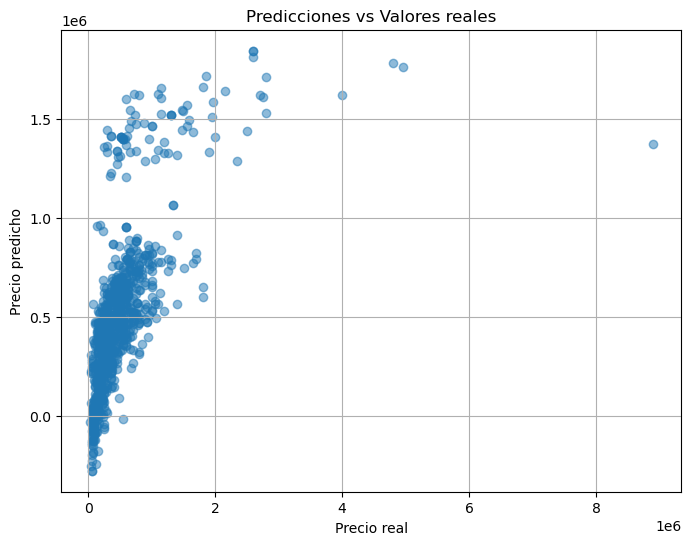

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Predicciones vs Valores reales")
plt.grid(True)
plt.show()